In [ ]:
#This Notebook is analysing the Turtle Games Manufacturer. Data Analysis of their Social media data and Sales data.

# Load and Exploring Data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# import data
reviews = pd.read_csv("turtle_reviews.csv")

# print DataFrame
print(reviews)

      gender  age  remuneration   spending_score (1-100)  loyalty_points  \
0       Male   18          12.30                      39             210   
1       Male   23          12.30                      81             524   
2     Female   22          13.12                       6              40   
3     Female   25          13.12                      77             562   
4     Female   33          13.94                      40             366   
...      ...  ...            ...                     ...             ...   
1995  Female   37          84.46                      69            4031   
1996  Female   43          92.66                       8             539   
1997    Male   34          92.66                      91            5614   
1998    Male   34          98.40                      16            1048   
1999    Male   32          92.66                       8             479   

     education language platform  product  \
0     graduate       EN      Web      453 

In [3]:
# Any missing values?
missing_values = reviews.isna()
print(missing_values)

      gender    age  remuneration   spending_score (1-100)  loyalty_points  \
0      False  False          False                   False           False   
1      False  False          False                   False           False   
2      False  False          False                   False           False   
3      False  False          False                   False           False   
4      False  False          False                   False           False   
...      ...    ...            ...                     ...             ...   
1995   False  False          False                   False           False   
1996   False  False          False                   False           False   
1997   False  False          False                   False           False   
1998   False  False          False                   False           False   
1999   False  False          False                   False           False   

      education  language  platform  product  review  summary  

In [4]:
# Explore the data.
print(reviews.dtypes)

gender                     object
age                         int64
remuneration              float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object


In [5]:
reviews.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration            2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [6]:
summary_stats = reviews.describe()

#descriptive statistics
print(summary_stats)

               age  remuneration   spending_score (1-100)  loyalty_points  \
count  2000.000000    2000.000000             2000.000000     2000.000000   
mean     39.495000      48.079060               50.000000     1578.032000   
std      13.573212      23.123984               26.094702     1283.239705   
min      17.000000      12.300000                1.000000       25.000000   
25%      29.000000      30.340000               32.000000      772.000000   
50%      38.000000      47.150000               50.000000     1276.000000   
75%      49.000000      63.960000               73.000000     1751.250000   
max      72.000000     112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000  


# Drop Coloumns

In [7]:
# Drop unnecessary columns.
reviews = reviews.drop(columns=['language', 'platform'])
print(reviews)

      gender  age  remuneration   spending_score (1-100)  loyalty_points  \
0       Male   18          12.30                      39             210   
1       Male   23          12.30                      81             524   
2     Female   22          13.12                       6              40   
3     Female   25          13.12                      77             562   
4     Female   33          13.94                      40             366   
...      ...  ...            ...                     ...             ...   
1995  Female   37          84.46                      69            4031   
1996  Female   43          92.66                       8             539   
1997    Male   34          92.66                      91            5614   
1998    Male   34          98.40                      16            1048   
1999    Male   32          92.66                       8             479   

     education  product                                             review  \
0     gra

In [8]:
# Create a new DataFrame with renamed columns
df1 = reviews.rename(columns={'spending_score (1-100)': 'spending', 'loyalty_points': 'loyalty'})

# Print the updated DataFrame
print(df1)

      gender  age  remuneration   spending  loyalty education  product  \
0       Male   18          12.30        39      210  graduate      453   
1       Male   23          12.30        81      524  graduate      466   
2     Female   22          13.12         6       40  graduate      254   
3     Female   25          13.12        77      562  graduate      263   
4     Female   33          13.94        40      366  graduate      291   
...      ...  ...            ...       ...      ...       ...      ...   
1995  Female   37          84.46        69     4031       PhD      977   
1996  Female   43          92.66         8      539       PhD      979   
1997    Male   34          92.66        91     5614  graduate     1012   
1998    Male   34          98.40        16     1048       PhD     1031   
1999    Male   32          92.66         8      479       PhD      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t

In [9]:
# Save cleaned data to a new CSV file
df1.to_csv('df1.csv', index=False)

In [10]:
# import data
reviews = pd.read_csv("df1.csv")

# print DataFrame
print(reviews)

      gender  age  remuneration   spending  loyalty education  product  \
0       Male   18          12.30        39      210  graduate      453   
1       Male   23          12.30        81      524  graduate      466   
2     Female   22          13.12         6       40  graduate      254   
3     Female   25          13.12        77      562  graduate      263   
4     Female   33          13.94        40      366  graduate      291   
...      ...  ...            ...       ...      ...       ...      ...   
1995  Female   37          84.46        69     4031       PhD      977   
1996  Female   43          92.66         8      539       PhD      979   
1997    Male   34          92.66        91     5614  graduate     1012   
1998    Male   34          98.40        16     1048       PhD     1031   
1999    Male   32          92.66         8      479       PhD      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t

# Linear Regression

In [11]:
#Spending vs Loyalty 

In [12]:
#To determine whether spending nature of a customer affects their loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 25 Apr 2024   Prob (F-statistic):          2.92e-263
Time:                        08:59:28   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

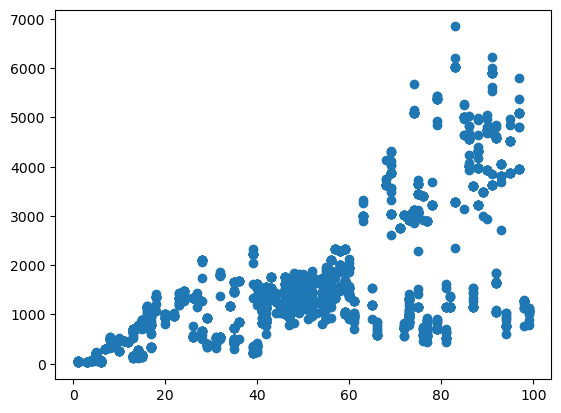

In [15]:
# Independent variable.
x=reviews["spending"]

# Dependent variable.
y= reviews["loyalty"]
           
plt.scatter(x, y)
           
# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews).fit()
test.summary()

In [ ]:
#notes
#For every one-unit increase in spending, loyalty increases by approximately 33.06 units.
#positive relationship between spending and loyalty.
#p-value shows that its statistically significant


In [16]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [ ]:
#significant positive effect on loyalty

In [17]:
# Create a DataFrame for the regression table
regression_table = pd.DataFrame({
    'Parameters': ['Constant', 'Spending (x)'],
    'Values': [-75.052663, 33.061693]
})

# Print the regression table
print(regression_table)

     Parameters     Values
0      Constant -75.052663
1  Spending (x)  33.061693


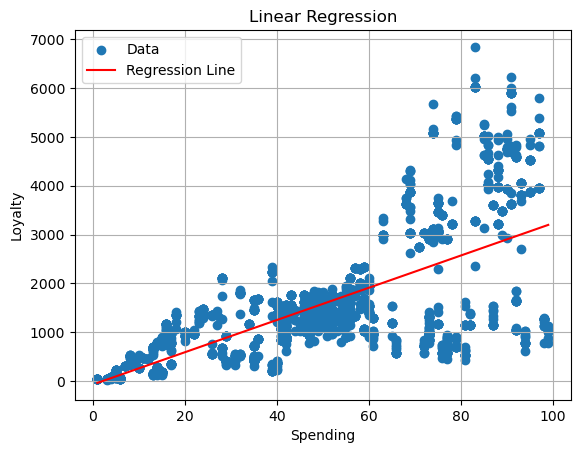

In [18]:
# Scatter plot of the data
plt.scatter(x, y, label='Data')

# Regression line
x_values = np.linspace(min(x), max(x), 100)
y_values = -75.052663 + 33.061693 * x_values  # Using the intercept and coefficient values
plt.plot(x_values, y_values, color='red', label='Regression Line')

plt.xlabel('Spending')
plt.ylabel('Loyalty')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Remuneration vs Loyalty

In [ ]:
#to analyse whether the remuneration of a customer has an effect on their loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 25 Apr 2024   Prob (F-statistic):          2.43e-209
Time:                        08:59:47   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

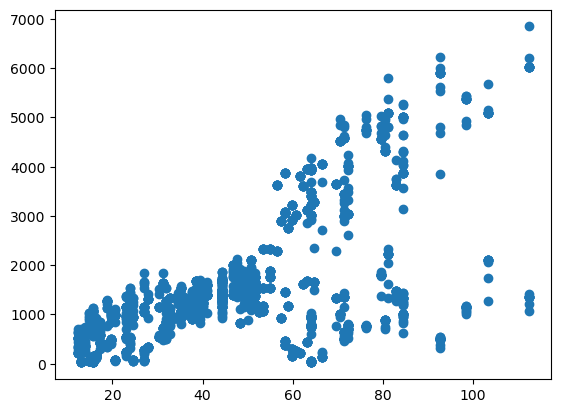

In [19]:
# Independent variable.
x=reviews["remuneration "]
# Dependent variable.

y= reviews["loyalty"]
           
plt.scatter(x, y)
           
# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews).fit()
test.summary()


In [ ]:
#For every one-unit increase in income, loyalty increases by approximately 34.1878 units.
#positive relationship between remuneration and loyalty 
#p-value..statistically significant

In [20]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [21]:
# Create a DataFrame for the regression table
regression_table = pd.DataFrame({
    'Parameters': ['Constant', 'Income (x)'],
    'Values': [-65.6865, 34.1878]
})

# Print the regression table
print(regression_table)

   Parameters   Values
0    Constant -65.6865
1  Income (x)  34.1878


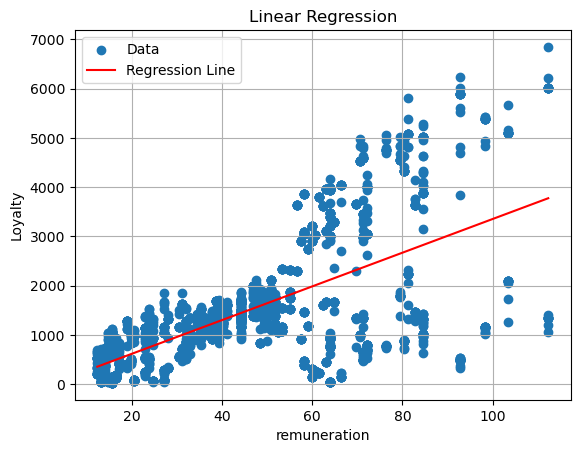

In [22]:
# Scatter plot of the data
plt.scatter(x, y, label='Data')

# Regression line
x_values = np.linspace(min(x), max(x), 100)
y_values = -65.6865 + 34.1878 * x_values  # Using the intercept and coefficient values
plt.plot(x_values, y_values, color='red', label='Regression Line')

plt.xlabel('remuneration')
plt.ylabel('Loyalty')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# age vs loyalty

In [ ]:
# to determine whether age has any effect on the loyalty of the customer

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 25 Apr 2024   Prob (F-statistic):             0.0577
Time:                        09:00:02   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

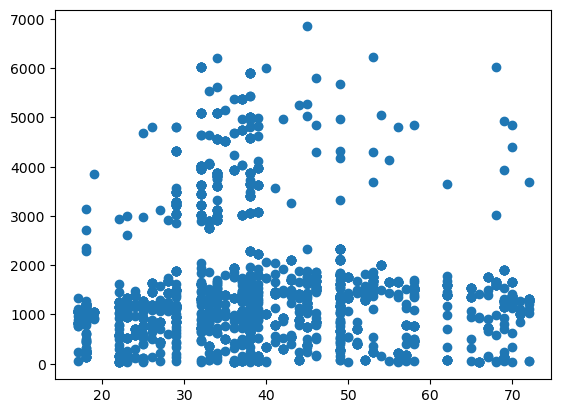

In [23]:
# Independent variable.

x=reviews["age"]

# Dependent variable.

y= reviews["loyalty"]
           
plt.scatter(x, y)
           
# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews).fit()
test.summary()

In [ ]:
#r-squared very low
#weak and potentially non-significant linear relationship between age and loyalty points
#negative co-efficient--negative relationship

In [24]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [25]:
# Create a DataFrame for the regression table
regression_table = pd.DataFrame({
    'Parameters': ['Constant', 'Income (x)'],
    'Values': [1736.517739, -4.012805]
})

# Print the regression table
print(regression_table)

   Parameters       Values
0    Constant  1736.517739
1  Income (x)    -4.012805


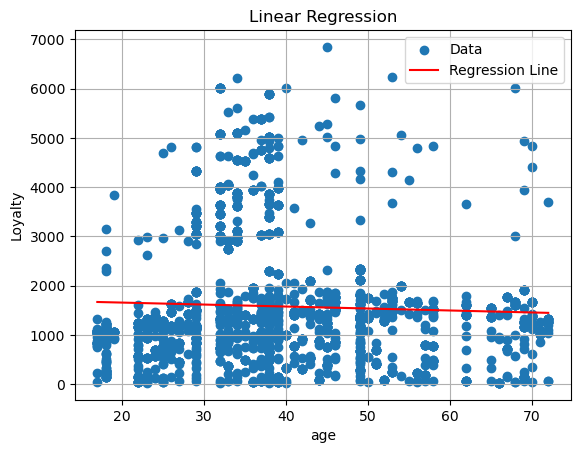

In [38]:
# Scatter plot of the data
plt.scatter(x, y, label='Data')

# Regression line
x_values = np.linspace(min(x), max(x), 100)
y_values = 1736.517739 + -4.012805  * x_values  # Using the intercept and coefficient values
plt.plot(x_values, y_values, color='red', label='Regression Line')

plt.xlabel('age')
plt.ylabel('Loyalty')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Insights
#Positive relationship (strong one at that): Loyalty and spending score
#negative realtionship(weak one at that ); age

# Clustering with K-means 

In [26]:
# import data
reviews = pd.read_csv("df1.csv")

# print DataFrame
print(reviews)

      gender  age  remuneration   spending  loyalty education  product  \
0       Male   18          12.30        39      210  graduate      453   
1       Male   23          12.30        81      524  graduate      466   
2     Female   22          13.12         6       40  graduate      254   
3     Female   25          13.12        77      562  graduate      263   
4     Female   33          13.94        40      366  graduate      291   
...      ...  ...            ...       ...      ...       ...      ...   
1995  Female   37          84.46        69     4031       PhD      977   
1996  Female   43          92.66         8      539       PhD      979   
1997    Male   34          92.66        91     5614  graduate     1012   
1998    Male   34          98.40        16     1048       PhD     1031   
1999    Male   32          92.66         8      479       PhD      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t

In [27]:
# Create a new DataFrame containing only the 'remuneration' and 'spending_score' columns
df2 = df1[['remuneration ', 'spending']].copy()

# Display the new DataFrame
print(df2)

      remuneration   spending
0             12.30        39
1             12.30        81
2             13.12         6
3             13.12        77
4             13.94        40
...             ...       ...
1995          84.46        69
1996          92.66         8
1997          92.66        91
1998          98.40        16
1999          92.66         8

[2000 rows x 2 columns]


In [ ]:
#plotting remuneration and spending as they are the variables that showed a strong effect on the loyalty points of a customer


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.06294
Date:                Thu, 25 Apr 2024   Prob (F-statistic):              0.802
Time:                        09:00:19   Log-Likelihood:                -9360.8
No. Observations:                2000   AIC:                         1.873e+04
Df Residuals:                    1998   BIC:                         1.874e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.6955      1.347     36.899      0.000      47.054      52.337
x              0.0063      0.025      0.251      0.802      -0.043       0.056
==============================================================================
Omnibus:                      256.861   Durbin-Watson:                   3.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.806
Skew:                          -0.044   Prob(JB):                     3.11e-15
Kurtosis:                       2.109   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

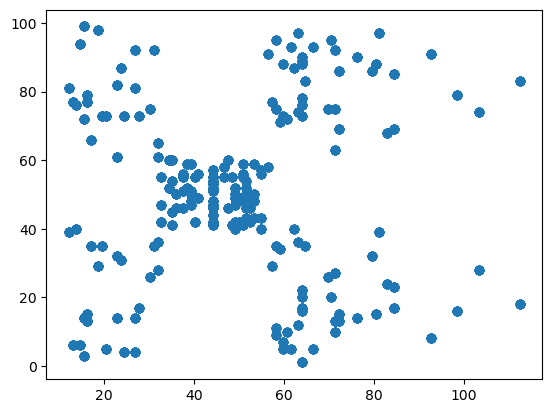

In [28]:
# Independent variable.

x=reviews["remuneration "]

# Dependent variable.

y= reviews["spending"]
           
plt.scatter(x, y)
           
# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews).fit()
test.summary()

In [ ]:
#r-squared is almost 0
#no statistically significant linear relationship between income and spending behavior


In [ ]:
#some clusters are visible,next section of analysis will look into grouping the clusters

In [29]:
from sklearn.cluster import KMeans
from sklearn import preprocessing


In [30]:
# Normalize the data
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(df2)

In [47]:
pip install --upgrade threadpoolctl

  Obtaining dependency information for threadpoolctl from https://files.pythonhosted.org/packages/1e/84/ccd9b08653022b7785b6e3ee070ffb2825841e0dc119be22f0840b2b35cb/threadpoolctl-3.4.0-py3-none-any.whl.metadata
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
Note: you may need to restart the kernel to use updated packages.


In [31]:
# Calculate WCSS (Within-Cluster-Sum-of-Squares) for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

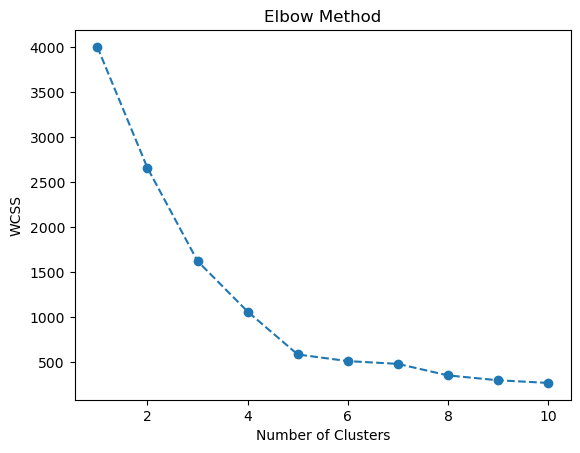

In [32]:
# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# normalize the data using StandardScaler from scikit-learn to ensure that all variables are on the same scale.
#iterate over different numbers of clusters (from 1 to 10) and fit K-means clustering models to the scaled data.


In [33]:
from sklearn.metrics import silhouette_score

In [34]:
# Normalize the data
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(df2)

In [35]:
# Calculate silhouette scores for different number of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)


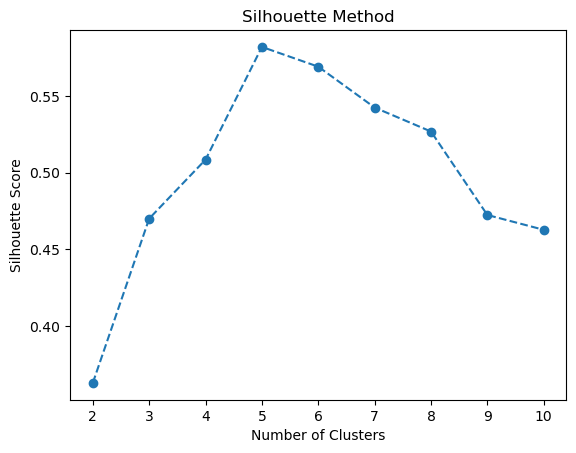

In [36]:
# Plot silhouette scores for different number of clusters
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
#from both the elbow method and silhouette method..we can say that the optimal number of clusters is 5.

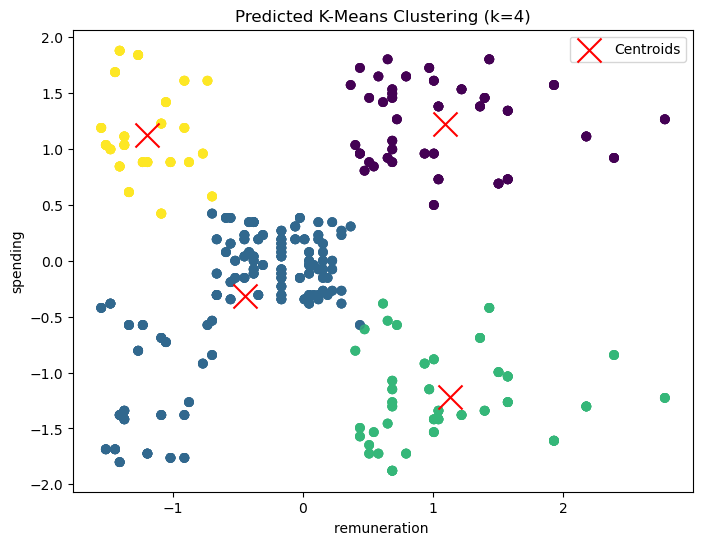

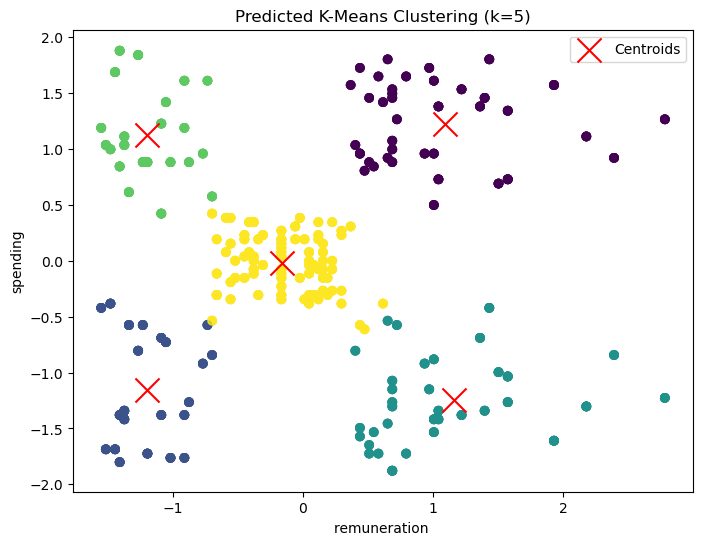

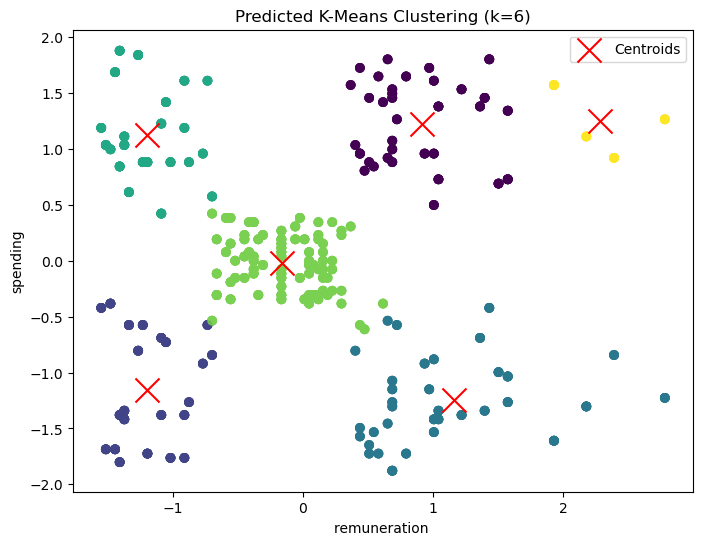

In [39]:
# Potential values for k
k_values = [4, 5, 6]

# Plot predicted k-means for each value of k
for k in k_values:
    # Initialize KMeans with the current value of k
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    
    # Fit KMeans to the scaled data
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    # Plot predicted clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.5)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
    plt.title(f'Predicted K-Means Clustering (k={k})')
    plt.xlabel('remuneration ')
    plt.ylabel('spending')
    plt.legend()
    plt.show()

#from the plots that have been generated above and the elbow and silhouette method, when the value is 5, it will give 
the best clusters with points grouped into significant categories and yet not overlapping and each category has a good 
amount of points. 

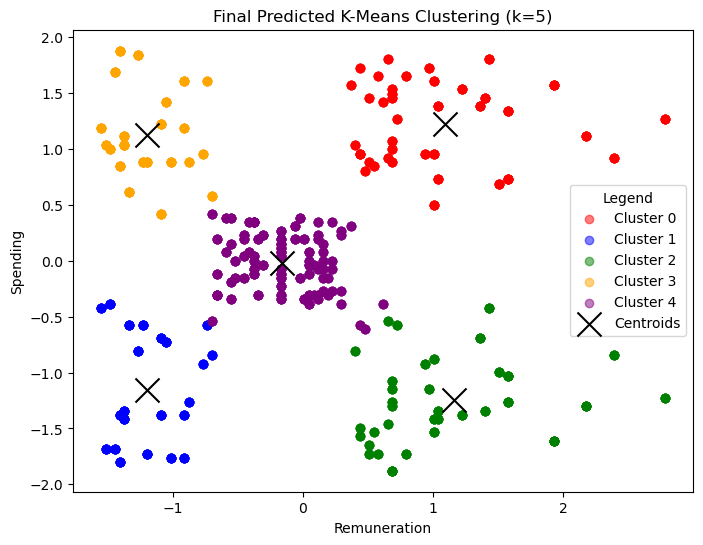

In [44]:
# Final model with k=5
k_final = 5
kmeans_final = KMeans(n_clusters=k_final, init='k-means++', random_state=42)
cluster_labels_final = kmeans_final.fit_predict(scaled_data)

# Define colors for each cluster
cluster_colors = ['red', 'blue', 'green', 'orange', 'purple']  

# Plot predicted clusters
plt.figure(figsize=(8, 6))
for i in range(k_final):
    plt.scatter(scaled_data[cluster_labels_final == i, 0], scaled_data[cluster_labels_final == i, 1], color=cluster_colors[i], marker='o', alpha=0.5, label=f'Cluster {i}')
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], s=300, c='black', marker='x', label='Centroids')
plt.title(f'Final Predicted K-Means Clustering (k={k_final})')
plt.xlabel('Remuneration')
plt.ylabel('Spending')
plt.legend(title='Legend')
plt.show()

The justification for choosing 5 is that it gives a clear indication of seperation and can be utlised in a way for better decision making. This effectively informs us about the customer groups that need to be concentrated on for better business.

In [45]:
# Count the number of observations per predicted class
class_counts = np.bincount(cluster_labels_final)

# Display the number of observations per class
for i, count in enumerate(class_counts):
    print(f"Cluster {i}: {count} observations")

Cluster 0: 356 observations
Cluster 1: 271 observations
Cluster 2: 330 observations
Cluster 3: 269 observations
Cluster 4: 774 observations


Visualise the clusters and then give insights

In [ ]:
#NLP

In [46]:
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [54]:
# Load the data set as df3.
df3= pd.read_csv("turtle_reviews.csv")
# View DataFrame.


In [55]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3.drop(columns=['gender', 'age', 'spending_score (1-100)', 'loyalty_points', 'education', 'language'])

In [56]:
print(df3.head())

   remuneration  platform  product  \
0          12.30      Web      453   
1          12.30      Web      466   
2          13.12      Web      254   
3          13.12      Web      263   
4          13.94      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap  


# Preperation of dataset for NLP

In [57]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].str.lower()
df3['review'] = df3['review'].str.join('')



In [58]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].str.lower()
df3['summary'] = df3['summary'].str.join('')

In [59]:
# Replace all the punctuations in review column.
def remove_punctuation(text):
    return text.str.replace(r'[^\w\s]', ' ')

# Replace punctuation in the 'review' and 'summary' columns with whitespace
df3['review'] = remove_punctuation(df3['review'])
df3['summary'] = remove_punctuation(df3['summary'])

In [60]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates(subset=['review', 'summary'])


# Tokenising and creating word clouds

In [61]:
# Create new DataFrame (copy DataFrame).
df3_copy = df3.copy()

# Apply tokenization to both columns.
df3_copy['review'] = df3['review'].apply(lambda x: x.split())
df3_copy['summary'] = df3['summary'].apply(lambda x: x.split())

# View DataFrame.
print(df3_copy.head())

   remuneration  platform  product  \
0          12.30      Web      453   
1          12.30      Web      466   
2          13.12      Web      254   
3          13.12      Web      263   
4          13.94      Web      291   

                                              review  \
0  [when, it, comes, to, a, dm's, screen,, the, s...   
1  [an, open, letter, to, galeforce9*:, your, unp...   
2  [nice, art,, nice, printing., why, two, panels...   
3  [amazing, buy!, bought, it, as, a, gift, for, ...   
4  [as, my, review, of, gf9's, previous, screens,...   

                                             summary  
0  [the, fact, that, 50%, of, this, space, is, wa...  
1  [another, worthless, dungeon, master's, screen...  
2              [pretty,, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]  


In [62]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


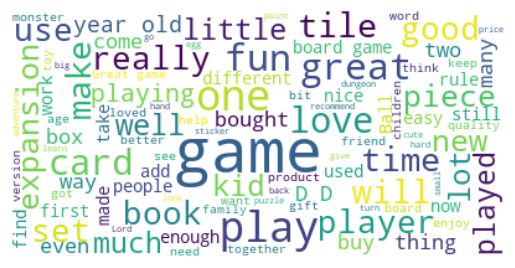

In [63]:
df3 = pd.read_csv("turtle_reviews.csv")

# Concatenate all 'review' strings
text = ' '.join(df3['review'])

# Generate word cloud
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the word cloud
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

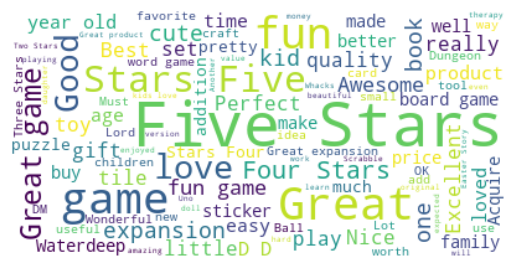

In [64]:
# Summary: Create a word cloud.
df3 = pd.read_csv("turtle_reviews.csv")

# Concatenate all 'review' strings
text = ' '.join(df3['summary'])

# Generate word cloud
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Save the word cloud as an image file
wordcloud.to_file("wordcloud.png")

# Display the word cloud
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Frequency Distribution and Polarity

In [65]:
# Create frequency distribution for 'review' column
frequency_distribution = df3["review"].value_counts()

# Print the frequency distribution
print(frequency_distribution)


review
love it                                                                                                                                                                                                                                                                                                                                                     5
great game                                                                                                                                                                                                                                                                                                                                                  3
Love it                                                                                                                                                                                                                                                                                              

In [66]:
from nltk.corpus import stopwords


In [ ]:
#removing alphanumeric characters

In [69]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Erin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [73]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define a function to remove alphanumeric characters and stopwords
def clean_text(text):
    # Remove alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Join the tokens back into a single string
    clean_text = ' '.join(tokens)
    return clean_text

# Apply the clean_text function to the 'review' column of df3
df3['review_cleaned'] = df3['review'].apply(clean_text)

# Display the head of the DataFrame with cleaned text
print(df3.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Erin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   gender  age  remuneration   spending_score (1-100)  loyalty_points  \
0    Male   18          12.30                      39             210   
1    Male   23          12.30                      81             524   
2  Female   22          13.12                       6              40   
3  Female   25          13.12                      77             562   
4  Female   33          13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's pre

In [72]:
print(df3.head())

   gender  age  remuneration   spending_score (1-100)  loyalty_points  \
0    Male   18          12.30                      39             210   
1    Male   23          12.30                      81             524   
2  Female   22          13.12                       6              40   
3  Female   25          13.12                      77             562   
4  Female   33          13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's pre

# 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [ ]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [ ]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity

plt.hist(df3['review'], bins=15, alpha=0.5, label='Review', color='blue')  # Histogram for 'review' column
plt.hist(df3['summary'], bins=15, alpha=0.5, label='Summary', color='red')  # Histogram for 'summary' column
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

# Positive and Negative Comments

In [ ]:
pip install textblob

In [ ]:
# Top 20 negative reviews.

import pandas as pd
from textblob import TextBlob
import re

# Remove alphanumeric characters
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = text.lower()  # Convert to lowercase
    return text

df3['review'] = df3['review'].apply(clean_text)

# Calculate sentiment polarity for each review
df3['sentiment'] = df3['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Sort the DataFrame by sentiment polarity
df3_sorted = df3.sort_values(by='sentiment')

# Get the top 20 negative reviews
top_20_negative_reviews = df3_sorted.head(20)

# Print the top 20 negative reviews
print(top_20_negative_reviews)


In [ ]:
# Top 20 negative summaries.

df3 = pd.read_csv("turtle_reviews.csv")

# Remove alphanumeric characters
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = text.lower()  # Convert to lowercase
    return text

df3['summary'] = df3['summary'].apply(clean_text)

# Calculate sentiment polarity for each review
df3['sentiment'] = df3['summary'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Sort the DataFrame by sentiment polarity
df3_sorted = df3.sort_values(by='sentiment')

# Get the top 20 negative reviews
top_20_negative_reviews = df3_sorted.head(20)

# Print the top 20 negative reviews
print(top_20_negative_reviews)


In [ ]:

# Calculate sentiment polarity for each review
df3['sentiment'] = df3['summary'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Sort the DataFrame by sentiment polarity in descending order to get positive reviews on top
df3_sorted = df3.sort_values(by='sentiment', ascending=False)

# Get the top 20 positive reviews
top_20_positive_reviews = df3_sorted.head(20)

# Print the top 20 positive reviews
print(top_20_positive_reviews)



In [ ]:
# Top 20 positive summaries.

# Calculate sentiment polarity for each review
df3['sentiment'] = df3['summary'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Sort the DataFrame by sentiment polarity in descending order to get positive reviews on top
df3_sorted = df3.sort_values(by='sentiment', ascending=False)

# Get the top 20 positive reviews
top_20_positive_reviews = df3_sorted.head(20)

# Print the top 20 positive reviews
print(top_20_positive_reviews)

